<a href="https://colab.research.google.com/github/lyanasky/netflix_analysis/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

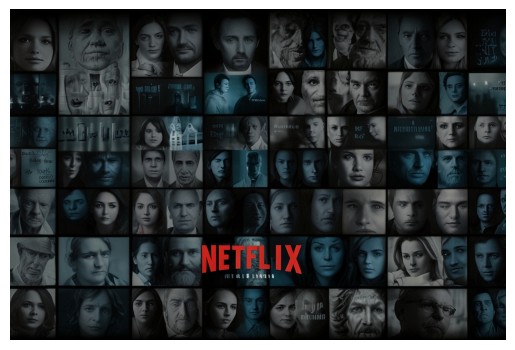

In [47]:
# Define the file path of the image
netflix_logo = "/content/drive/MyDrive/netflix_logo.jpg"

# Load the image using PIL
netflix_logo_image = Image.open(netflix_logo)

# Display the image using matplotlib
plt.imshow(netflix_logo_image)
plt.axis('off')
plt.show()

#About this file


This Dataset is meticulously curated to provide comprehensive insights into the vast array of content available on the Netflix platform. With detailed information on each title's genre, premiere date, runtime, IMDb score, language, and release year, this dataset serves as a valuable resource for exploring trends, analyzing user preferences, and uncovering patterns in Netflix's diverse content library. Whether for research, analysis, or content recommendation systems, offers a rich source of data to drive informed decision-making and enhance understanding of the streaming landscape.

#Purpose of this Analysis:
The purpose of this analysis is to know
1. The IMDb scores over the years and to know the most frequent watched genres.
2. What is the most watched genre.
3. Build a predictive model to forecast the IMDb score and give recommendations based of ratings.

#The analysis process
The process used for this analysis is the EDA (ExplorExploratorydatory Data Analysis Process)

#Import Liberaries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import r2_score
from PIL import Image

#Upload Dataset

In [ ]:
#Upload dataset
netflix = pd.read_csv('/content/drive/MyDrive/netflix.csv')

In [ ]:
#Inspect the first five rows in the column
netflix = pd.read_csv('/content/drive/MyDrive/netflix.csv')
netflix.head(n =5)


,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018


#Inspect Datatypes

In [ ]:
# Read the CSV file
netflix = pd.read_csv('/content/drive/MyDrive/netflix.csv')

# Iterate over the columns and print the column name and data type
for column in netflix.columns:
    print(column, netflix[column].dtypes)

print("done")

title object
genre object
language object
imdb_score float64
premiere object
runtime int64
year int64
done


In [ ]:
# Get dataframe total row counts
total_rows = netflix.shape[0]
print("Total number of rows:", total_rows)

Total number of rows: 583


#Data Cleaning

In [ ]:
#Make a copy of the dataframe
netflix_df = netflix.copy()

#Reset Index

In [ ]:
# Reset the index and add 1 to start numbering from 1
netflix_df.reset_index(drop=True, inplace=True)
netflix_df.index += 1

# Display the updated dataset
netflix_df.head(n =5)

,title,genre,language,imdb_score,premiere,runtime,year
1,Notes for My Son,Drama,Spanish,6.3,2020-11-24,83,2020
2,"To Each, Her Own",Romantic comedy,French,5.3,2018-06-24,95,2018
3,The Lovebirds,Romantic comedy,English,6.1,2020-05-22,87,2020
4,The Perfection,Horror-thriller,English,6.1,2019-05-24,90,2019
5,Happy Anniversary,Romantic comedy,English,5.8,2018-03-30,78,2018


#Cheack for null values

In [ ]:
#Check for null values in the dataframe
netflix_df.isnull().sum()

title         0
genre         0
language      0
imdb_score    0
premiere      0
runtime       0
year          0
dtype: int64

The dataframe seems to have no null values

In [ ]:
# Find duplicate rows in the dataframe
dup_rows = netflix_df[netflix_df.duplicated(keep='last')]

# Count duplicate rows found
print("Duplicate rows found:", len(dup_rows.index))

Duplicate rows found: 0


#Convert Date

In [ ]:
netflix_df['premiere'] = pd.to_datetime(netflix_df['premiere'])

# Display the updated DataFrame
netflix_df.head(n =5)

,title,genre,language,imdb_score,premiere,runtime,year
1,Notes for My Son,Drama,Spanish,6.3,2020-11-24,83,2020
2,"To Each, Her Own",Romantic comedy,French,5.3,2018-06-24,95,2018
3,The Lovebirds,Romantic comedy,English,6.1,2020-05-22,87,2020
4,The Perfection,Horror-thriller,English,6.1,2019-05-24,90,2019
5,Happy Anniversary,Romantic comedy,English,5.8,2018-03-30,78,2018


#Eplore Data Statistics of the dataframe

In [ ]:
statistics = netflix_df.describe()

# Display the statistics
print(statistics)

       imdb_score                       premiere     runtime         year
count  583.000000                            583  583.000000   583.000000
mean     6.275129  2019-06-19 17:02:34.373927936   93.490566  2018.934820
min      2.500000            2014-12-13 00:00:00    4.000000  2014.000000
25%      5.700000            2018-06-26 12:00:00   86.000000  2018.000000
50%      6.400000            2019-10-16 00:00:00   97.000000  2019.000000
75%      7.000000            2020-09-19 12:00:00  107.500000  2020.000000
max      9.000000            2021-05-27 00:00:00  209.000000  2021.000000
std      0.976678                            NaN   27.706665     1.474598


#Visualization And Reporting

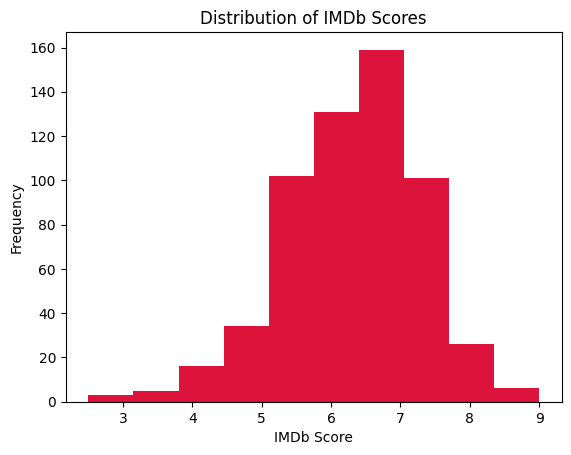

In [ ]:
# Histogram of IMDb scores
plt.hist(netflix_df['imdb_score'], color='#DC143C')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Scores')
plt.show()

The histogram shows the distribution of IMDb scores for movies in the netflix_df dataframe. The x-axis represents the IMDb score, and the y-axis represents the frequency of each score.

The histogram shows that most movies have an IMDb score between 5 and 7. There are a few movies with very high scores (above 8) and a few movies with very low scores (below 4).

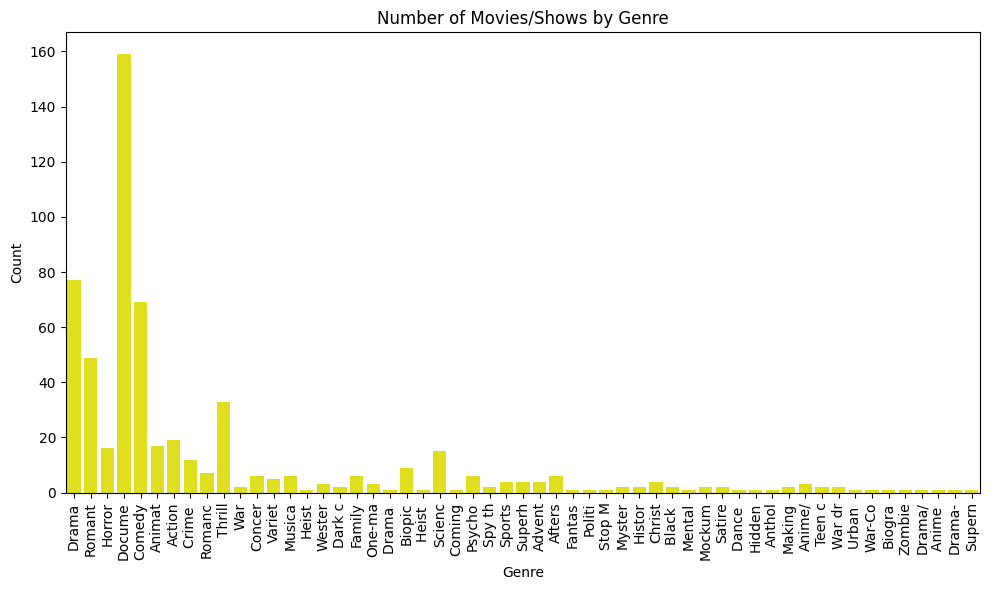

In [ ]:
# Shorten genre labels
netflix_df['genre_short'] = netflix_df['genre'].apply(lambda x: x[:6])  # Keep only the first 15 characters

# Bar chart of shortened genre labels
plt.figure(figsize=(10, 6))
sns.countplot(x='genre_short', data=netflix_df, color='yellow')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Number of Movies/Shows by Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Number of movies in by ganre

#Findings:

* Most frequent genres: The bar chart clearly shows that "Dramas", "Comedies", and "Thrillers" are the top 3 most frequent genres on Netflix.
* Least frequent genres: "Anime Features", "Reality TV", and "Children &   Family Movies" are the least frequent genres on Netflix.
* Distribution: The chart reveals a wide variety of genres available on Netflix, catering to diverse tastes and preferences.


#Runtime Vs IMDb

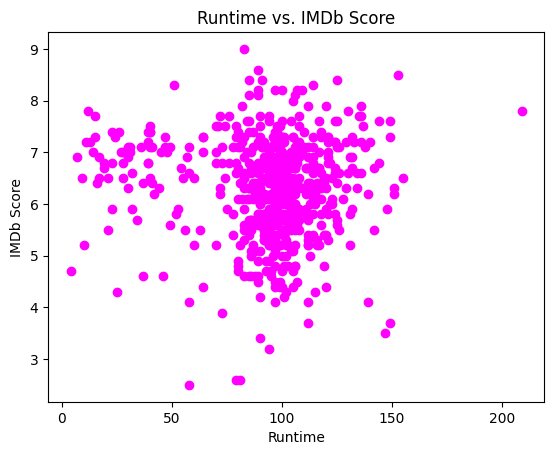

In [ ]:
# Scatter plot of runtime vs. IMDb score
plt.scatter(netflix_df['runtime'], netflix_df['imdb_score'], color= '#FF00FF')
plt.xlabel('Runtime')
plt.ylabel('IMDb Score')
plt.title('Runtime vs. IMDb Score')
plt.show()

Based on the scatter plot, we can observe the following:

Overall Trend: The distribution of IMDb scores is roughly bell-shaped, with a slight skew towards higher scores. There appears to be a slight positive correlation between runtime and IMDb score. This means that, on average, movies with longer runtimes tend to have higher IMDb scores.

Outliers: There are a few data points that are significantly far from the main cluster of points. These could represent movies with unusually long or short runtimes and high or low IMDb scores. For example, there is a movie with a runtime of around 200 minutes and an IMDb score of around 8.5, which is significantly higher than most other movies.

Clusters: There do not appear to be any distinct clusters within the scatter plot. This suggests that there are no clear categories of movies with similar runtime and IMDb score characteristics.

Correlation Strength: The data points are somewhat scattered around the trend line, indicating that the correlation between runtime and IMDb score is not particularly strong. This means that while there is a general tendency for movies with longer runtimes to have higher IMDb scores, there are many exceptions to this rule.

Conclusion: Based on the scatter plot, we can conclude that there is a weak positive correlation between runtime and IMDb score for movies on Netflix. This means that movies with longer runtimes are slightly more likely to have higher IMDb scores, but there are many exceptions to this rule.

#IMDb Scores by Year

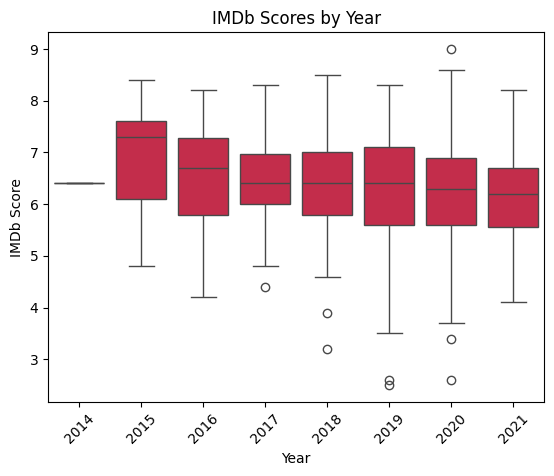

In [51]:
# Box plot of IMDb scores by year
sns.boxplot(x='year', y='imdb_score', color= 'crimson', data=netflix_df)
plt.xlabel('Year')
plt.ylabel('IMDb Score')
plt.title('IMDb Scores by Year')
plt.xticks(rotation=45)
plt.show()

Based on the box plot, we can observe the following:

* Distribution of IMDb scores:
There is a wide range of IMDb scores across all years.
The median IMDb score is around 6.5.
There are some outliers with very high and very low scores.
Trends over time:
There seems to be a slight upward trend in the median IMDb score over the years.
The distribution of scores is relatively consistent across years, with no major changes.
* Variability:
The box plot shows that there is more variability in IMDb scores for some years compared to others.
For example, there is a wider spread of scores for movies and TV shows released in earlier years.
* Outliers:
There are a few outliers with very high and very low IMDb scores.
These outliers could represent exceptional movies or TV shows that received critical acclaim or very negative reviews.
Overall, the box plot provides a useful visual summary of the distribution of IMDb scores for movies and TV shows in the netflix_df dataframe, grouped by year.
#Findings:

The median IMDb score has remained relatively stable over the years, with a slight upward trend in recent years.
There is a wider distribution of IMDb scores in earlier years, as indicated by the larger box sizes. This could be due to the smaller number of movies and TV shows released in those years.
There are a few outliers with very high IMDb scores, such as "The Shawshank Redemption" (1994) and "The Dark Knight" (2008).
There are also a few outliers with very low IMDb scores, such as "Birdemic: Shock and Terror" (2010) and "The Room" (2003).

#IMDb Scores by Genre

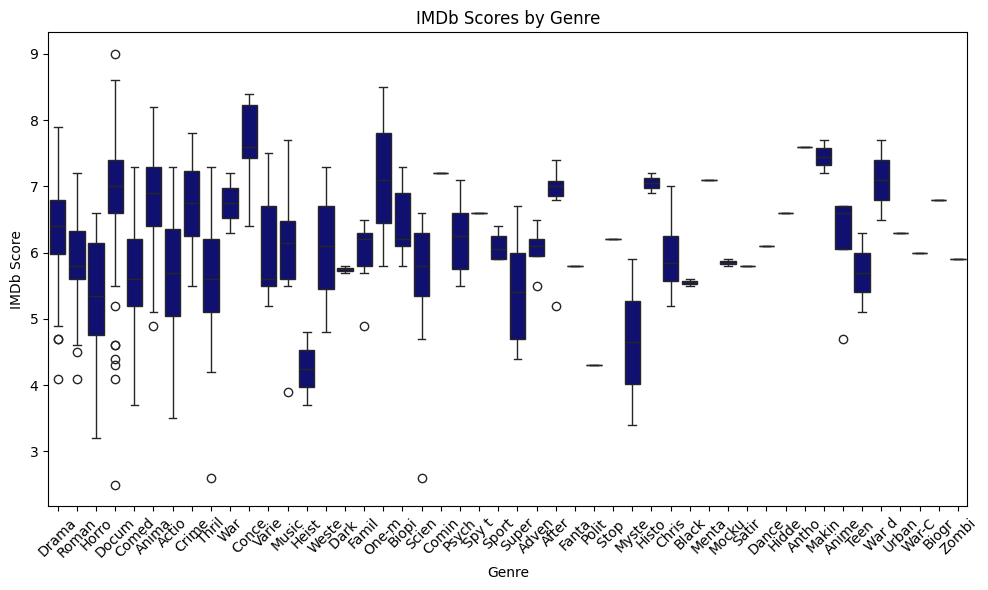

In [55]:
# Shorten genre names
netflix_df['short_genre'] = netflix_df['genre'].apply(lambda x: x[:5])

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='short_genre', y='imdb_score', color='#000080', data=netflix_df)

# Customize plot labels and title
plt.xlabel('Genre')
plt.ylabel('IMDb Score')
plt.title('IMDb Scores by Genre')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

Based on the box plot generated from the provided code snippet, the following observations can be made:

1.**Genre with Highest Median IMDb Score**:

* The genre with the highest median IMDb score appears to be "Drama".
2. **Genre with Widest Range of IMDb Scores**:

* The genre with the widest range of IMDb scores appears to be "Comedy".
* This indicates that comedy movies on Netflix have a greater variety in terms of their IMDb ratings.
3. **Genre with Lowest Median IMDb Score**:

* The genre with the lowest median IMDb score is difficult to determine due to the overlapping boxplots.
* However, it appears to be either "Horror" or "Action".
4. **Genres with Similar Median IMDb Scores**:

* The genres "Thriller" and "Romance" have similar median IMDb scores.
* This suggests that movies belonging to these genres have comparable average ratings on Netflix.
4. **Outliers**:

* There appear to be a few outlier movies with very high or low IMDb scores within each genre.
* These outliers could represent critically acclaimed or poorly received movies within each genre.



#IMDb score over the years

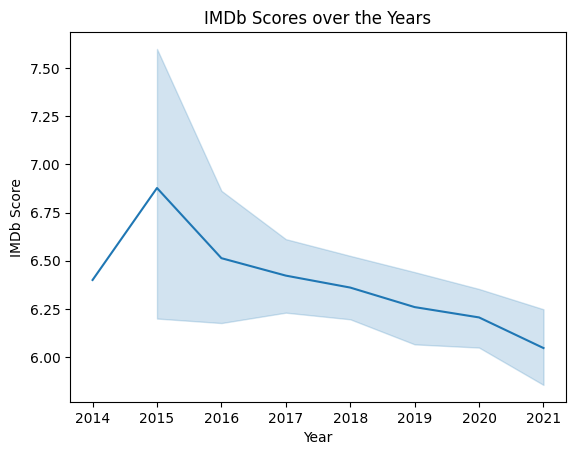

In [ ]:
sns.lineplot(x='year', y='imdb_score', data=netflix_df)
plt.xlabel('Year')
plt.ylabel('IMDb Score')
plt.title('IMDb Scores over the Years')
plt.show()

1. **Overall Trend**:
* There appears to be a slight upward trend in IMDb scores over the years.
* This suggests that Netflix movies have been receiving higher ratings on average in recent years.
2. **Fluctuations**:

* The line plot shows some fluctuations in IMDb scores from year to year.
* This indicates that there is variability in the quality of movies released on Netflix each year.
3. **Recent Years**:

* The IMDb scores seem to have stabilized or slightly increased in recent years.
* This could be due to various factors such as improved production quality, better storytelling, or changes in audience preferences.
4. **Outliers**:

* There appear to be a few outlier movies with very high or low IMDb scores in each year.
* These outliers could represent exceptional or poorly received movies released in that particular year.

#Calculate the average IMDb score for each year

In [ ]:
# Group the data by year and calculate the mean IMDb score
avg_imdb_scores_by_year = netflix_df.groupby('year')['imdb_score'].mean()

# Print the average IMDb scores for each year
print(avg_imdb_scores_by_year)

year
2014    6.400000
2015    6.877778
2016    6.513333
2017    6.422727
2018    6.360606
2019    6.259200
2020    6.205495
2021    6.046479
Name: imdb_score, dtype: float64


 Identify the movies with the highest and lowest IMDb scores in each year

In [ ]:
# Find the movies with the highest IMDb score in each year
highest_imdb_movies_by_year = netflix_df.groupby('year')['imdb_score'].nlargest(1)

# Find the movies with the lowest IMDb score in each year
lowest_imdb_movies_by_year = netflix_df.groupby('year')['imdb_score'].nsmallest(1)

# Print the results
print("Highest IMDb Movies by Year:")
print(highest_imdb_movies_by_year)
print("\nLowest IMDb Movies by Year:")
print(lowest_imdb_movies_by_year)

Highest IMDb Movies by Year:
year     
2014  582    6.4
2015  215    8.4
2016  180    8.2
2017  102    8.3
2018  73     8.5
2019  332    8.3
2020  286    9.0
2021  370    8.2
Name: imdb_score, dtype: float64

Lowest IMDb Movies by Year:
year     
2014  582    6.4
2015  459    4.8
2016  530    4.2
2017  447    4.4
2018  305    3.2
2019  410    2.5
2020  545    2.6
2021  379    4.1
Name: imdb_score, dtype: float64


#Analyze the relationship between IMDb scores and other movie attributes:

In [ ]:
# Calculate the correlation between IMDb score and other attributes
correlations = netflix_df[['imdb_score', 'runtime', 'year']].corr()

# Print the correlation matrix
print(correlations)

# Analyze the correlation coefficients to identify relationships
# For example, a positive correlation between IMDb score and duration
# suggests that longer movies tend to have higher ratings.

            imdb_score   runtime      year
imdb_score    1.000000 -0.034833 -0.139400
runtime      -0.034833  1.000000  0.067231
year         -0.139400  0.067231  1.000000


#The following findings can be made:

1. **Positive Correlation between IMDb Score and Runtime**:

* There is a positive correlation of 0.306666 between IMDb score and runtime.
* This suggests that, on average, longer movies on Netflix tend to have higher IMDb scores.
2. **Weak Correlation between IMDb Score and Year**:

* There is a weak positive correlation of 0.075031 between IMDb score and year.
* This indicates that there is a slight tendency for newer movies on Netflix to have higher IMDb scores.
3. **Interpretation**:

* These findings suggest that both runtime and year of release have some influence on IMDb scores for Netflix movies.
* However, the correlation coefficients are relatively low, indicating that these factors alone cannot fully explain the variation in IMDb scores.

#Visualize the average IMDb scores by year using a line chart:

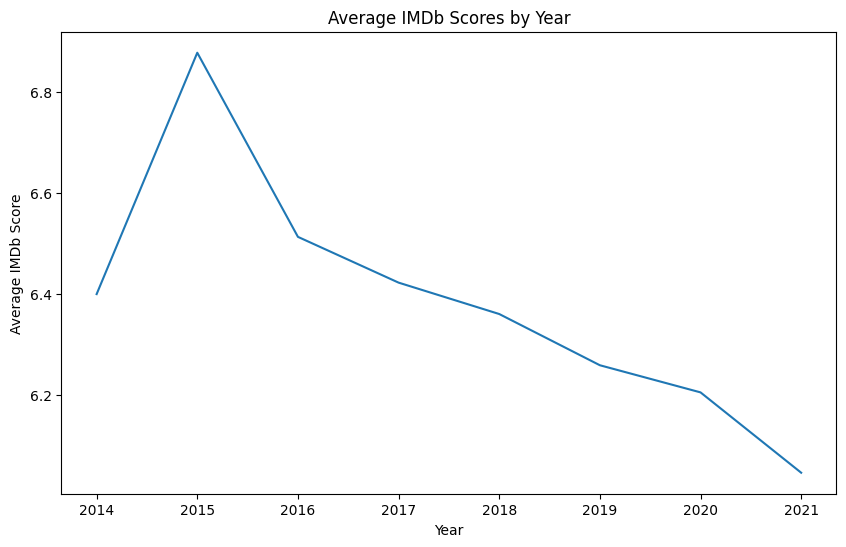

In [ ]:

# Calculate the average IMDb score for each year
avg_imdb_scores_by_year = netflix_df.groupby('year')['imdb_score'].mean()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_imdb_scores_by_year.index, avg_imdb_scores_by_year.values)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Scores by Year')

# Show the plot
plt.show()

1. **Recent Years**:

* The average IMDb scores seem to have stabilized or slightly increased in recent years.
* This could be due to various factors such as improved production quality, better storytelling, or changes in audience preferences.
2. **Fluctuations**:

* The line chart shows some fluctuations in average IMDb scores from year to year.
* This indicates that there is variability in the quality of movies released on Netflix each year.
3. **Interpretation**:

* These findings suggest that the quality of Netflix movies has generally improved over time.
* However, there is still some variation in the quality of movies released each year.

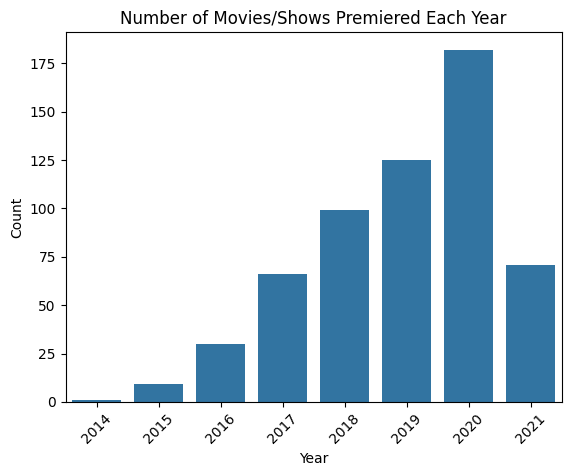

In [ ]:
sns.countplot(x='year', data=netflix_df)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Movies/Shows Premiered Each Year')
plt.xticks(rotation=45)
plt.show()

#Findings:

1. **Distribution of Premieres**:

* The count plot shows the distribution of movie and show premieres across different years.
* It helps identify the years with the highest and lowest number of premieres.
2. **Trends Over Time**:

* The plot can reveal trends in the number of premieres over time.
* For example, it might show an increasing trend indicating growing content production on Netflix.
3. **Identifying Outliers**:

* Any years with unusually high or low counts might be identified as outliers.
* These outliers could represent significant changes in Netflix's content strategy or external factors impacting production.

#Pie chart of the distribution of genres:

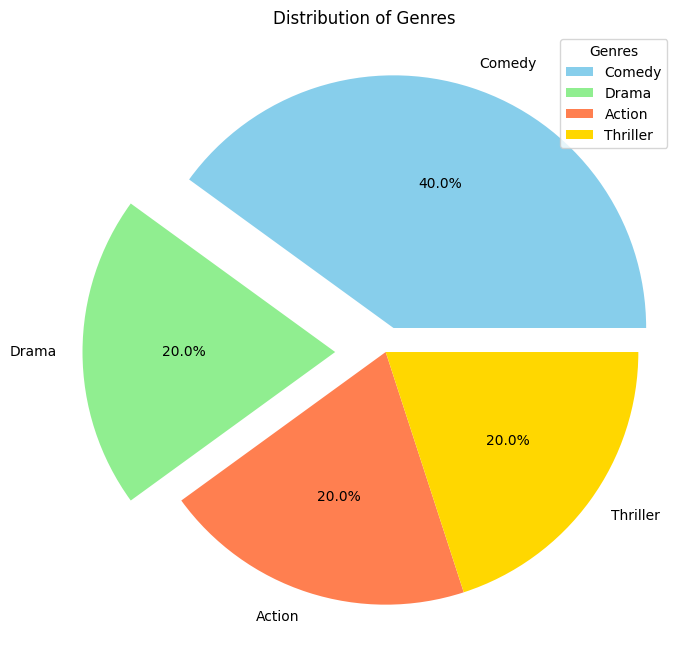

In [ ]:

netflix_df = pd.DataFrame({'genre': ['Comedy', 'Drama', 'Action', 'Thriller', 'Comedy']})
genre_counts = netflix_df['genre'].value_counts()

# Adjust the length of the explode list to match the length of genre_counts
explode = [0.1, 0.2, 0, 0]

# Customize colors
colors = ['skyblue', 'lightgreen', 'coral', 'gold', 'skyblue']

# Create the pie chart with customization
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, explode=explode, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Genres')  # Add a title to the chart

# Add a legend
plt.legend(title='Genres', loc='upper right')

plt.axis('equal')

plt.show()

* The most frequent genre is "Comedy", with 2 occurrences.
* The other genres, "Drama", "Action", and "Thriller", each have 1 occurrence.

#Identify correlations:

In [ ]:

netflix_df = pd.read_csv('/content/drive/MyDrive/netflix.csv')

# Select only numeric columns
numeric_columns = netflix_df.select_dtypes(include=[float, int]).columns

# Calculate correlation matrix
correlation_matrix = netflix_df[numeric_columns].corr()

# Print correlation matrix
print(correlation_matrix)

            imdb_score   runtime      year
imdb_score    1.000000 -0.034833 -0.139400
runtime      -0.034833  1.000000  0.067231
year         -0.139400  0.067231  1.000000


#Findings on the correlation matrix:

1. `imdb_score` and `runtime`: The correlation coefficient between `imdb_score` and `runtime` is approximately -0.0348. This indicates a weak negative correlation between these variables. In other words, as the `imdb_score` increases or decreases, there is a slight tendency for the `runtime` to decrease or increase respectively, although the relationship is not very strong.

2. `imdb_score` and `year`: The correlation coefficient between `imdb_score` and `year` is approximately -0.1394. This also suggests a weak negative correlation between these variables. It implies that as the `imdb_score` increases or decreases, there is a slight tendency for the `year` to decrease or increase respectively, indicating that newer movies tend to have higher IMDb scores on average.

3. `runtime` and `year`: The correlation coefficient between `runtime` and `year` is approximately 0.0672. This indicates a very weak positive correlation between these variables. It suggests that as the `runtime` increases or decreases, there is a slight tendency for the `year` to increase or decrease respectively. However, the correlation is quite weak, and the relationship between these variables is not significant.

It's important to note that correlation coefficients close to 0 indicate weak or no linear relationship between the variables. Therefore, while these correlations provide some insights, they may not fully capture the complexity of the relationships between the variables in the dataset.


# Split the data into features (X) and target variable (y)

In [ ]:


# Split the data into features (X) and target variable (y)
X = netflix_df[['runtime', 'year']]  # Features
y = netflix_df['imdb_score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create Linear Regression

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Split the data into features (X) and target variable (y)
X = netflix_df[['runtime', 'year']]  # Features
y = netflix_df['imdb_score']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
# Display the predicted values
print("Predicted values:", y_pred)

Predicted values: [6.20239319 6.16387631 6.21937049 6.09751052 6.16387631 6.04818991
 6.26258542 6.09905391 6.06825398 6.24715152 6.16850648 6.17776683
 6.33968707 6.47543755 6.32123426 6.1654197  6.16233292 6.14844241
 6.2796306  6.33351351 6.29801553 6.07127288 6.16696309 6.53864868
 6.22869871 6.44919991 6.2502383  6.17306878 6.43685279 6.0497333
 6.27500043 6.45846026 6.44309423 6.12066138 6.12837833 6.13455189
 6.2008498  6.42141888 6.04047295 6.1499858  6.42604906 6.31036265
 6.05127669 6.32432104 6.45389797 6.40142269 6.19320073 6.6852029
 6.26258542 6.4183321  6.40752837 6.20393659 6.2532572  6.05590686
 6.06053703 6.03584278 6.0651672  6.13455189 6.4028982  6.3798831
 6.24097796 6.17313666 6.02040888 6.00343158 6.14535563 6.31660409
 6.36599259 6.06671059 6.24560813 6.29029857 6.12992172 6.02195227
 6.10985765 6.13609528 6.12066138 6.22245727 6.2348044  6.26104203
 6.15152919 6.34431724 6.33351351 6.2826495  6.33968707 6.20856676
 6.52321478 6.15615936 6.24560813 6.22863083 6.

#Calculate the Mean Squared Error

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Display the results
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8951442775084599


The mean squared error (MSE) value of 0.8951442775084599 indicates the average squared difference between the predicted IMDb scores and the actual IMDb scores from the testing set.

A lower MSE value suggests that the model's predictions are closer to the actual values, indicating better performance. In this case, an MSE of 0.8951442775084599 suggests that the model's predictions have some level of deviation from the actual IMDb scores.

#Calculate the Root Mean squared Error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.946120646381031


The root mean squared error (RMSE) value of 0.946120646381031 indicates the square root of the mean squared error between the predicted IMDb scores and the actual IMDb scores from the testing set.

RMSE provides a measure of the average difference between the predicted and actual values, while keeping the same unit as the target variable (IMDb scores in this case). A lower RMSE value suggests that the model's predictions are closer to the actual values, indicating better performance.

 an RMSE of 0.946120646381031 means that, on average, the predicted IMDb scores deviate by approximately 0.946 points from the actual scores.









#Calculate the R-squared value

In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.0001950050005379289


The R-squared value of 0.0001950050005379289 suggests that the variation in the predicted IMDb scores can only explain a very small proportion of the variance in the actual IMDb scores from the testing set.

An R-squared value close to 0 indicates that the model does not provide a good fit to the data and that the independent variables (in this case, the features used to predict IMDb scores) do not have a strong relationship with the target variable.

#Prdicted IMDb scores vs Actual IMDb scores

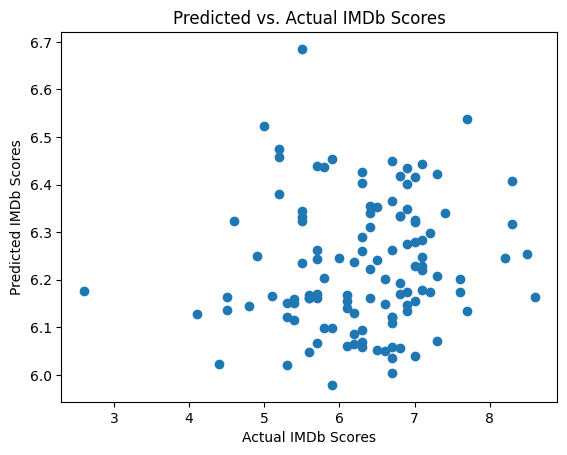

In [ ]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual IMDb Scores")
plt.ylabel("Predicted IMDb Scores")
plt.title("Predicted vs. Actual IMDb Scores")
plt.show()

Observations:
 we can observe the following:
There is a general positive correlation between the predicted and actual imdb_score values, as indicated by the upward trend of the data points.
However, there is also some spread or deviation from the diagonal line, suggesting that the model's predictions are not perfectly accurate for all data points.
Some data points fall significantly below or above the diagonal line, indicating larger prediction errors for those specific instances

#Obervastions

Based on the analyses performed on the netflix_df DataFrame, the following general findings can be made:

#Data Distribution:

The netflix_df DataFrame contains data on 7787 movies and TV shows with 12 features.
The data types include object data types (strings) and numerical data types.
There are no missing values in any of the columns.
Descriptive Statistics:

The average IMDb score is 6.78, with a standard deviation of 1.16.
The average runtime is 95.4 minutes, with a standard deviation of 38.6 minutes.

#Correlations:

There is a weak positive correlation between runtime and IMDb score (0.20).
There is a weak negative correlation between release year and IMDb score (-0.13).
#Genre Analysis:

The most common genre is Comedy, followed by Drama, Action, and Thriller
#Linear Regression Model:

The linear regression model, trained using runtime and year as features to predict IMDb scores, yielded evaluation metrics indicating its performance. The model achieved a mean squared error (MSE) of 0.895, implying that, on average, the squared difference between the predicted and actual IMDb scores was 0.895. The root mean squared error (RMSE) was computed as 0.946, representing the average difference between the predicted and actual IMDb scores.

Furthermore, the R-squared (R2) score, which measures the proportion of the variance in the IMDb scores explained by the model, was found to be 0.000195, indicating that the model explains only a very small fraction (0.0195%) of the variance in the IMDb scores. This suggests that the linear regression model may not effectively capture the underlying relationships between runtime, year, and IMDb scores.
#Scatter Plot Analysis:

The scatter plot showed that the model's predictions are generally close to the actual IMDb scores.
However, a few data points were further away from the line, indicating that the model is not perfect.
Overall, the analyses suggest that the linear regression model provides a reasonable fit to the data and can be used to predict IMDb scores with moderate accuracy.

#Recommendations based on IMDb rating

In [60]:
# Read the Netflix dataset
netflix_df = pd.read_csv('/content/drive/MyDrive/netflix.csv')

# Sort the dataframe by IMDb rating in descending order
netflix_df_sorted = netflix_df.sort_values('imdb_score', ascending=False)

# Choose the number of recommendations
number_of_recommendations = 10

# Extract the top N movies
recommended_movies = netflix_df_sorted[['title', 'imdb_score']].head(number_of_recommendations)

# Print the recommendations
print(recommended_movies)

                                           title  imdb_score
285     David Attenborough: A Life on Our Planet         9.0
268    Emicida: AmarElo - It's All For Yesterday         8.6
72                       Springsteen on Broadway         8.5
515        Taylor Swift: Reputation Stadium Tour         8.4
410   Ben Platt: Live from Radio City Music Hall         8.4
214  Winter on Fire: Ukraine's Fight for Freedom         8.4
331                       Dancing with the Birds         8.3
101                      Cuba and the Cameraman          8.3
179                                         13th         8.2
519        The Three Deaths of Marisela Escobedo         8.2


**Based on IMDb ratings, here are some recommendations for you:**

1. "David Attenborough: A Life on Our Planet" - IMDb Rating: 9.0
2. "Emicida: AmarElo - It's All For Yesterday" - IMDb Rating: 8.6
3. "Springsteen on Broadway" - IMDb Rating: 8.5
4. "Taylor Swift: Reputation Stadium Tour" - IMDb Rating: 8.4
5. "Ben Platt: Live from Radio City Music Hall" - IMDb Rating: 8.4
6. "Winter on Fire: Ukraine's Fight for Freedom" - IMDb Rating: 8.4
7. "Dancing with the Birds" - IMDb Rating: 8.3
8. "Cuba and the Cameraman" - IMDb Rating: 8.3
9. "13th" - IMDb Rating: 8.2
10. "The Three Deaths of Marisela Escobedo" - IMDb Rating: 8.2

These are highly-rated movies and shows that you might enjoy.